<a href="https://colab.research.google.com/github/sedavasema/one-shot-learning/blob/main/4_my_introfacerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-j5dsjdh6
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-j5dsjdh6
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8298 sha256=4135505a816c43f1f4f3dffeb33ea761bbe61106c2bf2234e2e8231fcce23ea0
  Stored in directory: /tmp/pip-ephem-wheel-cache-3yyttiyn/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface


In [3]:
!mkdir images

In [4]:
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh_prob.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/daraee.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/daraee_prob.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/zaree.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/zaree_prob.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/tahmasbi.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/tahmasbi_prob.jpg -P images
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/who_is.jpg -P images

--2023-06-21 09:26:45--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132827 (130K) [image/jpeg]
Saving to: ‘images/moh.jpg’

moh.jpg             100%[===================>] 129.71K  --.-KB/s    in 0.02s   

2023-06-21 09:26:45 (5.17 MB/s) - ‘images/moh.jpg’ saved [132827/132827]

--2023-06-21 09:26:45--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/folder/moh_prob.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27504 (2

In [5]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.9 MB/s eta 0:00:00


In [6]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.1 MB/s eta 0:00:00


In [7]:
import numpy as np
from keras.preprocessing import image
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
from mtcnn.mtcnn import MTCNN
import cv2

In [8]:
face_detector = MTCNN()

# تست این که فیس دیتکشن درست کار میکند یا نه ؟

1/1 [==============================] - 1s 872ms/step


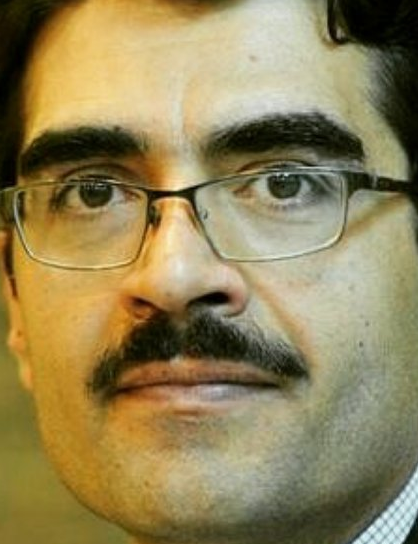

In [9]:
from google.colab.patches import cv2_imshow
X=cv2.imread("./images/moh.jpg")
X = cv2.cvtColor(X, cv2.COLOR_BGR2RGB) #mtcnn expects RGB but OpenCV read BGR
detections = face_detector.detect_faces(X)
detection = detections[0]
x, y, w, h = detection["box"]
detected_face = X[int(y):int(y+h), int(x):int(x+w)]
#plt.imshow(img_rgb)
cv2_imshow(cv2.cvtColor(detected_face, cv2.COLOR_RGB2BGR))

# حالا که تابع ما درست کار میکند ان را به صورت یک فانکشن مینویسیم

In [10]:
def detect_face(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #mtcnn expects RGB but OpenCV read BGR
    detections = face_detector.detect_faces(img)
    detection = detections[0]
    x, y, w, h = detection["box"]
    detected_face = img[int(y):int(y+h), int(x):int(x+w)]
    return detected_face

In [11]:
#read images
moh=cv2.imread("./images/moh.jpg")

In [12]:
moh_prob = cv2.imread('./images/moh_prob.jpg')

In [13]:
zaree =cv2.imread('./images/zaree.jpg')

In [14]:
def preprocess_face(img, target_size=(224,224)):
    img = cv2.resize(img, target_size)
    img_pixels = np.expand_dims(img,axis = 0)
    img_pixels = img_pixels.astype('float32')
    img_pixels /= 255 #normalize input in [0, 1]
    return img_pixels

In [ ]:
#model = VGGFace() # default : VGG16 , you can use model='resnet50' or 'senet50'

In [15]:
model =VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg') # pooling: None, avg or max

58909280/58909280 [==============================] - 1s 0us/step


In [16]:
def get_embedding(img):
    X=detect_face(img)
    X=preprocess_face(X)
    emb = model.predict(X)
    return emb

In [17]:
emb1 = get_embedding(moh)
emb2 = get_embedding(moh_prob)
emb3 = get_embedding(zaree)

1/1 [==============================] - 0s 18ms/step


In [18]:
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [19]:
def cosinDistance(source_representation, test_representation):
    from numpy import linalg as LA
    test_representation=np.transpose(test_representation)
    cosine = np.dot(source_representation,test_representation)/(LA.norm(source_representation)*LA.norm(test_representation))
    cosine=np.asscalar(cosine)
    return 1-cosine

In [20]:
dist1=cosinDistance(emb1[0],emb2[0])
dist2=cosinDistance(emb1,emb3)
dist3 = findEuclideanDistance(emb1, emb2)
dist4 = findEuclideanDistance(emb1, emb3)

<ipython-input-19-2d3c886ed3ba>:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  cosine=np.asscalar(cosine)


In [21]:
print ("distance cosin moh and moh_prob =", dist1)
print ("distance cosin moh and zaree ="   , dist2)

print ("distance Euclideasan moh and moh_prob =", dist3)
print ("distance Euclideasan moh and zaree =", dist4)

distance cosin moh and moh_prob = 0.19073444604873657
distance cosin moh and zaree = 0.36856693029403687
distance Euclideasan moh and moh_prob = 0.5628289
distance Euclideasan moh and zaree = 0.73581094
